In [2]:
from datasets import load_dataset, load_from_disk

ds = load_dataset("Artificio/WikiArt_Full", split='train')

In [3]:
ds_test = ds.select(range(100))

len(ds_test)

100

In [4]:
type(ds[0]['image'])

PIL.JpegImagePlugin.JpegImageFile

### NumPy generator:

<span style="color:red">
TODO: Irregular shape damage
</span>

In [117]:
import numpy as np
from PIL import Image, ImageDraw, JpegImagePlugin, PngImagePlugin
from io import BytesIO
import time
import matplotlib.pyplot as plt

def generate_square_damage(image: JpegImagePlugin.JpegImageFile, square_side=64) -> JpegImagePlugin.JpegImageFile:
    draw = ImageDraw.Draw(image)

    x = np.random.randint(0, image.size[0] - square_side)
    y = np.random.randint(0, image.size[1] - square_side)

    square_coords = [(x, y), (x + square_side, y + square_side)]

    draw.rectangle(square_coords, fill=(255, 255, 255))

    buffer = BytesIO()
    image.save(buffer, format='JPEG', quality=100)
    buffer.seek(0)  # Cofnięcie wskaźnika na początek bufora

    # Załadowanie obrazu jako PngImageFile
    return Image.open(buffer)

# start = time.time()
# for i in range(100):
#     image = generate_square_damage(ds[i]['image'], square_side=32)
# end = time.time()
# print(f'Time: {end - start}')

image = generate_square_damage(ds[0]['image'], square_side=32)

image_original = ds[0]['image']

# image.save('img1.jpg')
# image_original.save('img2.jpg')

type(image)

PIL.JpegImagePlugin.JpegImageFile

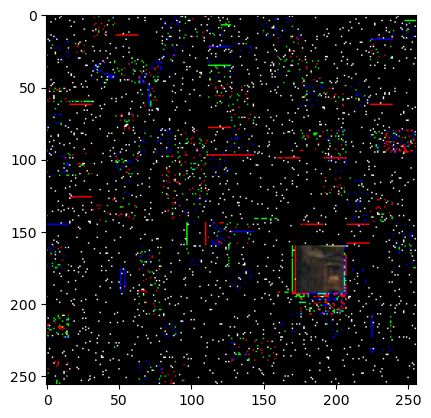

9.888071695963541

In [118]:
img = np.array(image_original) - np.array(image)

plt.imshow(img)
plt.show()

np.mean(img)

In [4]:
def add_damaged_images(batch):
    batch['image_square_damage'] = [generate_square_damage(image, 32) for image in batch['image']]
    return batch

ds_with_damaged_images = ds.map(add_damaged_images, batched=True, num_proc=4)

ds_with_damaged_images.save_to_disk('WikiArt_damaged')

Map (num_proc=4):   0%|          | 0/103250 [00:00<?, ? examples/s]

NameError: name 'generate_square_damage' is not defined

In [6]:
ds_damaged = load_from_disk('../WikiArt_damaged')


Loading dataset from disk:   0%|          | 0/28 [00:00<?, ?it/s]

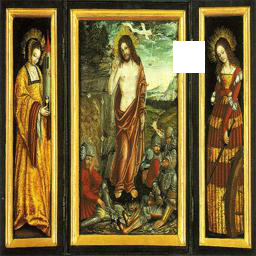

In [11]:

ds_damaged[6722]['image_square_damage']